In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('train.csv')
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [3]:
print(X.shape)

(42000, 784)


In [4]:
print(y.shape)

(42000,)


In [5]:
print(y)

[1 0 1 ... 7 6 9]


In [9]:
(unique,counts) = np.unique(y,return_counts=True)

In [12]:
print(np.asarray((unique,counts)))

[[   0    1    2    3    4    5    6    7    8    9]
 [4132 4684 4177 4351 4072 3795 4137 4401 4063 4188]]


<BarContainer object of 10 artists>

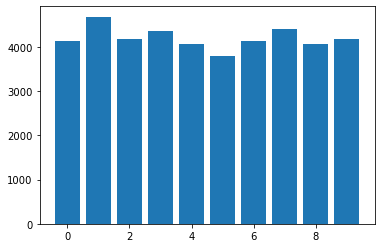

In [15]:
plt.bar(unique,counts)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[791   0   2   2   0   4  13   0   0   1]
 [  0 951   5   0   0   0   3   1   1   0]
 [ 15   8 800  11   5   0   6   7   5   3]
 [  1   2   7 806   1  11   1  16  12   6]
 [  1   8   9   0 769   4   2   6   1  27]
 [  5   4   1  27   1 697   9   1   6   5]
 [  5   1   3   0   1   7 824   0   0   0]
 [  1  11   9   1  11   0   0 839   0  27]
 [  5   9   2  16   8  41   6   5 668   8]
 [  6   1   3   4  20   2   0  34   2 740]]


0.9386904761904762

In [40]:
test = pd.read_csv('test.csv').values

In [42]:
print(test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
print(test.shape)

(28000, 784)


In [44]:
y_test_prediction = classifier.predict(test)

In [45]:
print(y_test_prediction.shape)

(28000,)


In [46]:
df = pd.DataFrame({"ImageId":np.arange(1,28000+1),"Label":y_test_prediction})

In [47]:
print(df.head(10))

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3


In [48]:
df.to_csv('Results.csv',index=False)

In [54]:
img1 = test[0].reshape(28,28)

The digit with ImageId=1 is  2


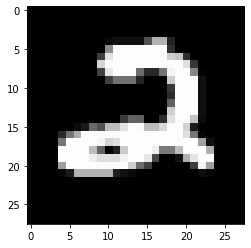

In [62]:
plt.imshow(img1,cmap='gray')
print("The digit with ImageId=1 is ",df["Label"][0])

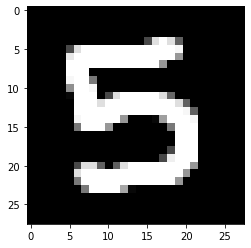

In [57]:
img2 = cv2.imread('testImage2.png',0)
plt.imshow(img2,cmap='gray')

In [58]:
img2 = np.reshape(img2,(1,784))

In [59]:
classifier.predict(img2)

array([5], dtype=int64)